In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import signal,stats

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'data/facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [18]:
training_data.describe()

/Users/mablou/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


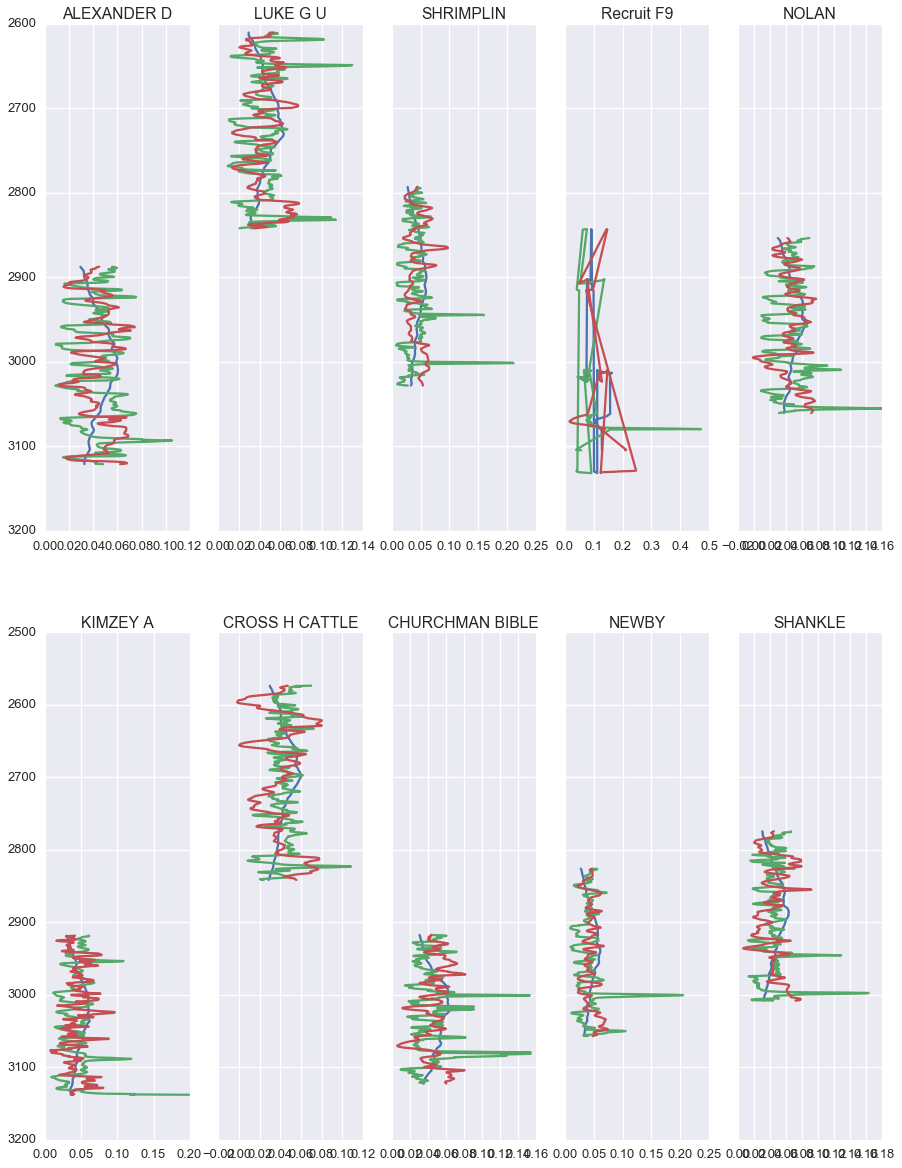

In [19]:
sns.set_context("talk")
nrows=2
fig, axs = plt.subplots(figsize=(15,20), 
                        nrows=nrows, ncols=5,     # fix as above
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex=False) # Much control of gridspec

grouped = training_data.groupby(['Well Name'])
targets = zip(grouped.groups.keys(), axs.flatten())


for i in range(nrows):
    axs[i,0].invert_yaxis() 

for i, (key, ax) in enumerate(targets):
    cc = signal.correlate(grouped.get_group(key).GR,grouped.get_group(key).ILD_log10,'same')
    norm_GR = grouped.get_group(key).GR / np.linalg.norm(grouped.get_group(key).GR)
    norm_ILD_log10 = grouped.get_group(key).ILD_log10 / np.linalg.norm(grouped.get_group(key).ILD_log10)
    norm_cc = cc / np.linalg.norm(cc)
    
    ax.plot(norm_cc,grouped.get_group(key).Depth)
    ax.plot(norm_GR,grouped.get_group(key).Depth)
    ax.plot(norm_ILD_log10,grouped.get_group(key).Depth)
    ax.set_title('%s'%key)
#     ax.set_xlim(0,10)

In [27]:
data = grouped.get_group('SHANKLE').GR
depth = grouped.get_group('SHANKLE').Depth

In [28]:
len(cc)
len(grouped.get_group(key).Depth)

449

In [91]:
from skimage.filters.rank import entropy
from skimage.morphology import rectangle
from skimage.util import img_as_ubyte

In [92]:
footprint=rectangle(5,3)

/Users/mablou/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


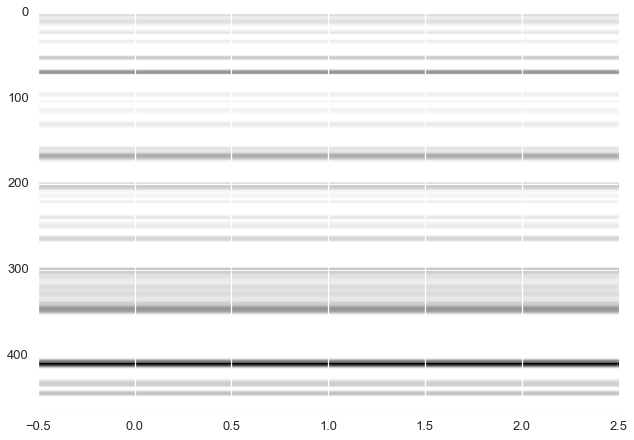

In [93]:
toto = np.vstack((data,data,data))
toto -= np.median(toto) 
toto /= np.max(np.abs(toto))
toto = img_as_ubyte(toto)
plt.imshow(toto.T,aspect='auto')

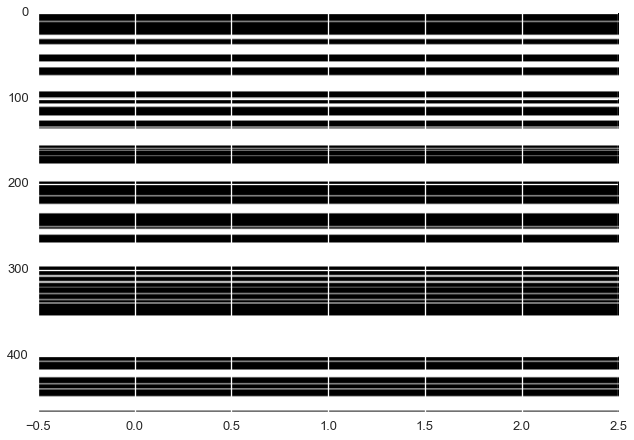

In [94]:
log_entropy = entropy(toto,footprint)
plt.imshow(log_entropy.T,aspect='auto')

/Users/mablou/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


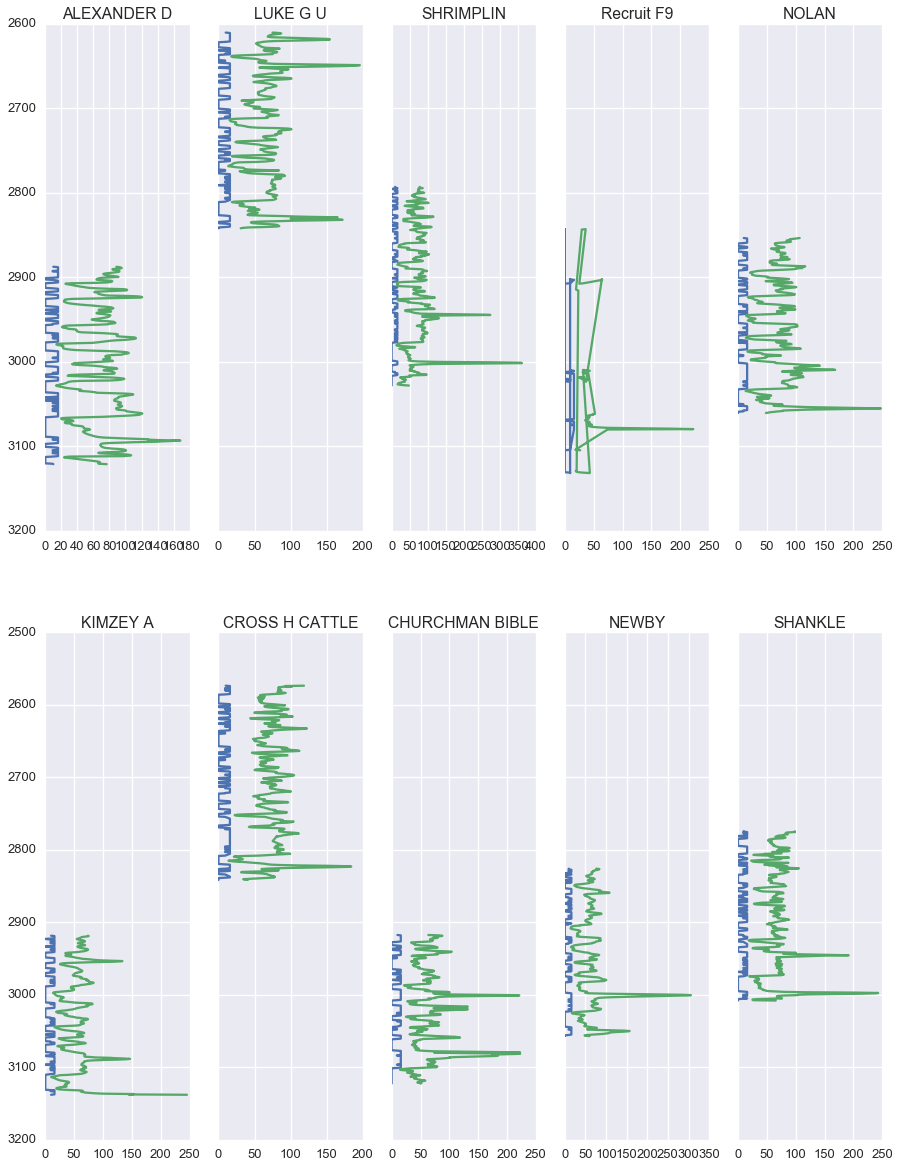

In [98]:
sns.set_context("talk")
footprint = rectangle(5,3)
nrows=2
fig, axs = plt.subplots(figsize=(15,20), 
                        nrows=nrows, ncols=5,     # fix as above
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex=False) # Much control of gridspec

grouped = training_data.groupby(['Well Name'])
targets = zip(grouped.groups.keys(), axs.flatten())


for i in range(nrows):
    axs[i,0].invert_yaxis() 

for i, (key, ax) in enumerate(targets):
    
    data = grouped.get_group(key).GR
    
    image = np.vstack((data,data,data))
    image -= np.median(image) 
    image /= np.max(np.abs(image))
    image = img_as_ubyte(image)
    
    log_entropy = entropy(image,footprint)[0,:]

    ax.plot(log_entropy*10,grouped.get_group(key).Depth)
    ax.plot(data,grouped.get_group(key).Depth)
    ax.set_title('%s'%key)
#     ax.set_xlim(0,10)

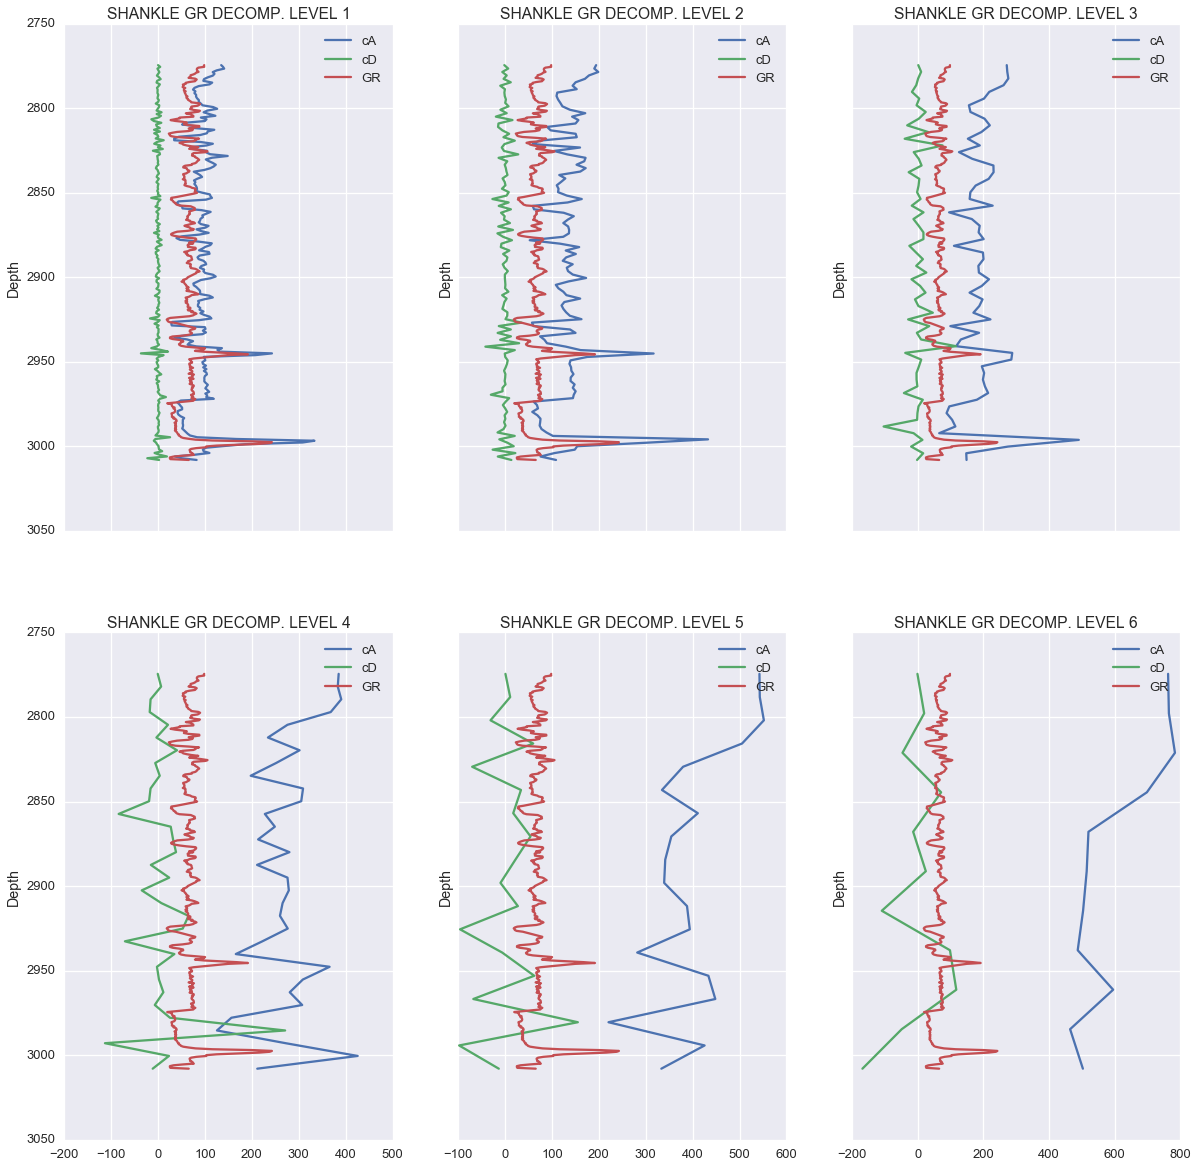

In [143]:
n_levels = 6

fig, axs = plt.subplots(figsize=(20,20), 
                        nrows=2, ncols=3, 
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex='col') # Much control of gridspec
for i in range(nrows):
    axs[i,0].invert_yaxis()


temp_data = data
for i,ax in zip(range(1,n_levels+1),axs.flatten()):
    
    cA,cD = pywt.dwt(temp_data,db3,mode='symmetric')
    ax.plot(cA,np.linspace(min(depth),max(depth),len(cA)))
    ax.plot(cD,np.linspace(min(depth),max(depth),len(cD)))
    ax.plot(data,depth)
    ax.set_title('SHANKLE GR DECOMP. LEVEL %d' % (i))
    ax.set_ylabel('Depth')
    ax.legend(['cA','cD','GR'])
    temp_data = cA

In [142]:
from scipy.interpolate import interp1d

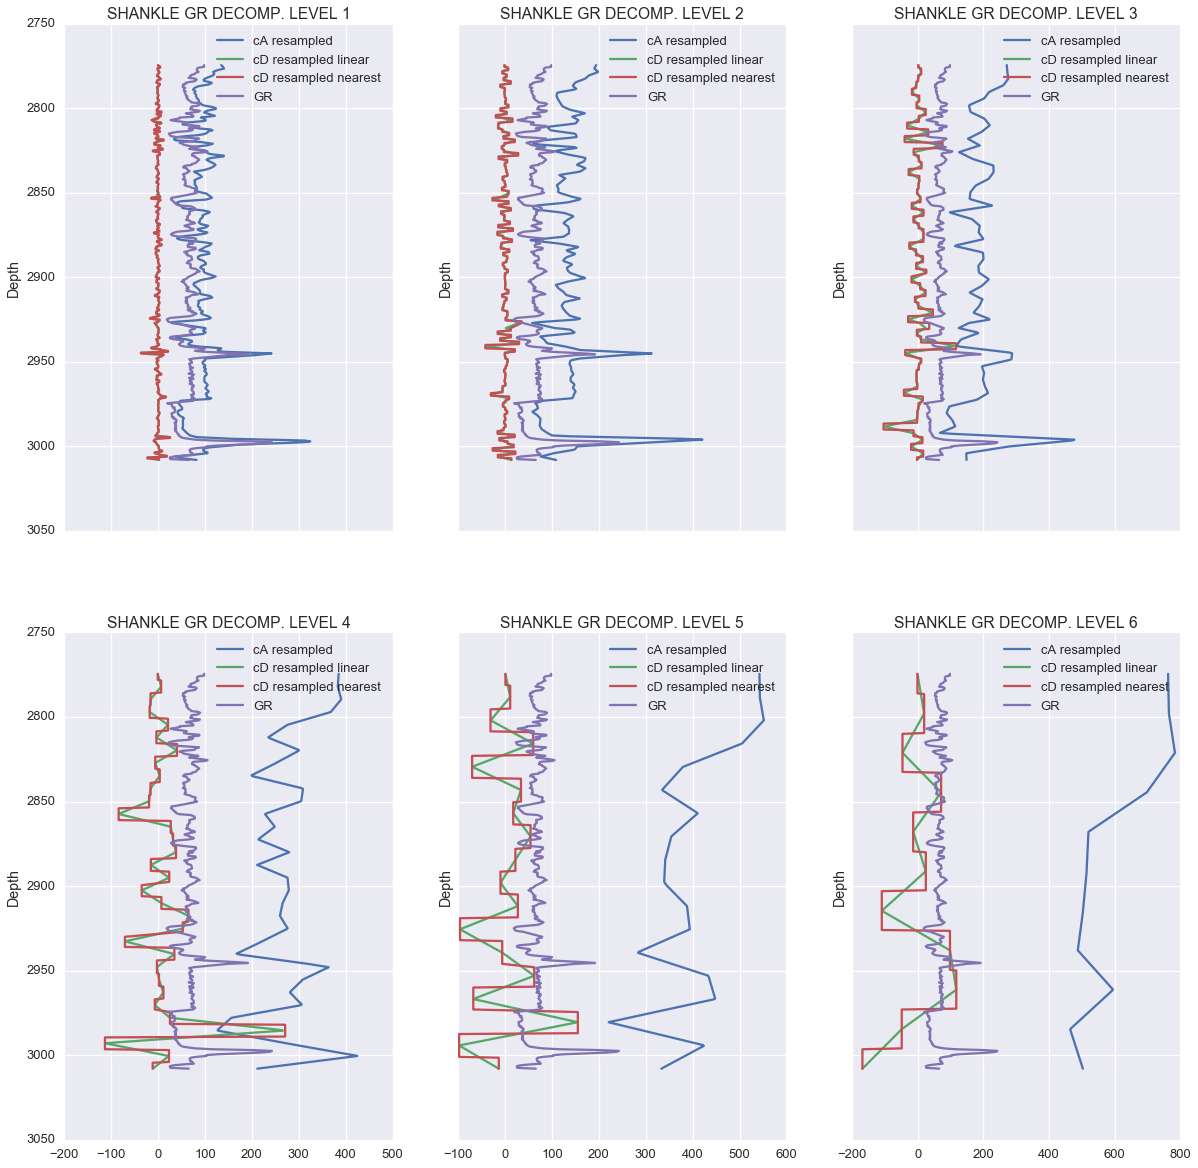

In [144]:
n_levels = 6

fig, axs = plt.subplots(figsize=(20,20), 
                        nrows=2, ncols=3, 
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex='col') # Much control of gridspec
for i in range(nrows):
    axs[i,0].invert_yaxis()


temp_data = data
for i,ax in zip(range(1,n_levels+1),axs.flatten()):
    
    cA,cD = pywt.dwt(temp_data,db3,mode='symmetric')
    
    new_depth = np.linspace(min(depth),max(depth),len(cD))
    f1 = interp1d(new_depth,cD,kind='linear')
    f2 = interp1d(new_depth,cD,kind='nearest')
    f3 = interp1d(new_depth,cA,kind='linear')
    
    cD1 = f1(depth)
    cD2 = f2(depth)
    cA1 = f3(depth)
    
    ax.plot(cA1,depth)
    ax.plot(cD1,depth)
    ax.plot(cD2,depth)
    ax.plot(data,depth)
    ax.set_title('SHANKLE GR DECOMP. LEVEL %d' % (i))
    ax.set_ylabel('Depth')
    ax.legend(['cA resampled','cD resampled linear','cD resampled nearest','GR'])
    temp_data = cA